In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

In [4]:
# access a particular partition
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int64,string
2021-09-21,...,...


In [5]:
ddf.b

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    string
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Dask Name: getitem, 2 expressions
Expr=df['b']

In [6]:
ddf["2021-10-01": "2021-10-09 5:00"]

,a,b
npartitions=1,,
2021-10-01 00:00:00.000000000,int64,string
2021-10-09 05:00:59.999999999,...,...


In [7]:
ddf["2021-10-01": "2021-10-09 5:00"].compute()

,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


In [8]:
ddf.a.mean()

ddf.a.mean().compute()

ddf.b.unique()

ddf.b.unique().compute()

0    e
0    c
1    d
0    a
0    b
Name: b, dtype: string

In [9]:
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result

result.compute()

2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: h, Name: a, Length: 198, dtype: int64

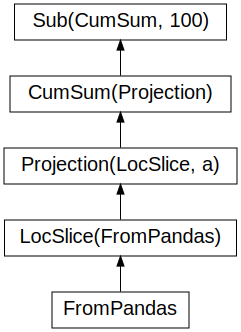

In [10]:
result.dask

result.visualize()

In [11]:
import dask

@dask.delayed
def inc(x):
   return x + 1

@dask.delayed
def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c = c.compute()  # This triggers all of the above computations

In [1]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.47 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37421,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.47 GiB
Comm: tcp://127.0.0.1:41253,Total threads: 2
Dashboard: http://127.0.0.1:34343/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:40579,


In [2]:
import dask.bag as db
import json

dd_data = db.read_text("../datasets/corrected_datafiles/*.jsonl").map(json.loads)
dd_data


dask.bag<loads, npartitions=31>

In [3]:
dd_data.take(1)

({'minister': 'Pastor David Oyedepo',
  'channel_name': 'PR ONDERI',
  'title': 'Bishop David Oyedepo | FUNDAMENTAL Requirements for DIVINE EMPOWERMENT | Key Foundations',
  'description': "In this enlightening video, Bishop David Oyedepo delves into the fundamental requirement for divine empowerment. Join us as we explore the key principles for unlocking God's power in your life. Discover the essential elements needed to access divine empowerment in this powerful message by Bishop David Oyedepo. Learn how to align yourself with God's will and experience a supernatural transformation. Key Foundations for Divine Empowerment\n#bishopdavidoyedepo #winnerschapelworldwide #personalgrowth #divineempowerment #empowerment #leadershiplessons #leadershipprinciples",
  'views': 10110,
  'length': 4629,
  'transcript': "shall we lift up our hands before the Lord Jesus we have come to you you are the one that invited us to come you said come unto me all ye that labor and are heavy laden and I will 

In [4]:
data = dd_data.to_dataframe()
data.head()

,minister,channel_name,title,description,views,length,transcript,source,corrected_transcript
0,Pastor David Oyedepo,PR ONDERI,Bishop David Oyedepo | FUNDAMENTAL Requirement...,"In this enlightening video, Bishop David Oyede...",10110,4629,shall we lift up our hands before the Lord Jes...,https://www.youtube.com/watch?v=ReFcIdOcEGA&pp...,shall we lift up our hands before the Lord Jes...
1,Pastor David Oyedepo,Seasoned Tongue,The siege of misfortune is over in your life -...,#shortfeeds\n#shortsfeed \n#shorts \n#bishopda...,494,36,the siege of Misfortune is over in your life t...,https://www.youtube.com/shorts/Q6Ygep2BkYM,the siege of Misfortune is over in your life t...
2,Pastor David Oyedepo,It’s Jesus Or Nothing Else,What you find is what defines your destiny! 🤯💯...,What you find is what defines your destiny!\n\...,442,44,what one finds in the book is what defines his...,https://www.youtube.com/shorts/dgvHS6Cg8fQ,what one finds in the book is what defines his...
3,Pastor David Oyedepo,Living Faith Church Worldwide,"COVENANT HOUR OF PRAYER | 31, DECEMBER 2024 FA...",Welcome to Our Covenant Hour of Prayer.\nIf yo...,40883,4332,e e e praise the Lord Fortune is my portion in...,https://www.youtube.com/watch?v=QukJlMgyVvY&pp...,e e e praise the Lord Fortune is my portion in...
4,Pastor David Oyedepo,Apostle Tv,2025 - Two Ways to Actualize Prophecy By David...,Discover the profound insights of Bishop David...,665,1028,he that receives a prophet in the name of a pr...,https://www.youtube.com/watch?v=Qa2G8USjq8k&pp...,he that receives a prophet in the name of a pr...


In [5]:
data = data[["minister", "channel_name", "title", "description", "transcript", "source"]]
data

,minister,channel_name,title,description,transcript,source
npartitions=31,,,,,,
,object,object,object,object,object,object
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [6]:
ministers = list(data["minister"].unique().compute())

2025-01-27 20:18:52,357 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 4f5eef936cfccb0164ac34d6385eec3d initialized by task ('shuffle-transfer-4f5eef936cfccb0164ac34d6385eec3d', 26) executed on worker tcp://127.0.0.1:41253
2025-01-27 20:18:54,863 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 4f5eef936cfccb0164ac34d6385eec3d deactivated due to stimulus 'task-finished-1738005534.8603957'


In [35]:
ministers

['Pastor David Oyedepo',
 'Pastor Enoch Adeboye',
 'Apostle Joshua Selman',
 'Apostle Michael Orokpo',
 'Apostle Femi Lazarus',
 'Pastor David Ibiyeome']

In [24]:
import numpy as np
import dask.dataframe as dd

def filter_minister(df, minister):
    return df[df.minister == minister]

for minister in ministers:
    filtered_mp = data.map_partitions(filter_minister, minister)
    filtered_mp = filtered_mp[filtered_mp != np.nan]
    dd.to_json(filtered_mp, url_path = f"../datasets/{minister}.json.xz", compression="xz")

print("All done")

All done


['/home/cirec/Documents/cirec-01-llm-falcon/notebooks/david.csv']

In [25]:
import torch

torch.hub.set_dir("./cache")
model, example_texts, languages, punct, apply_te = torch.hub.load(repo_or_dir='snakers4/silero-models', model='silero_te', )

Using cache found in ./cache/snakers4_silero-models_master


In [ ]:
# import dask.dataframe as dd
# from deepmultilingualpunctuation import PunctuationModel

# # Assuming 'dat' is your Dask DataFrame and 'transcript' is the column
# # ... (Your previous code to load and prepare 'dat') ...

# model = PunctuationModel()

# # Define a function to handle missing values
# def restore_punctuation_safe(text):
#     if isinstance(text, str):
#         return model.restore_punctuation(text)
#     else:
#         return ""  # Or any other suitable value for missing data

# # Get the metadata from the original DataFrame, including all columns
# meta = dat.head(0)  # Get an empty DataFrame with the correct schema

# # Apply the function using map_partitions and providing metadata
# ddat = dat.map_partitions(
#     lambda df: df.assign(transcript=df['transcript'].apply(restore_punctuation_safe)),
#     meta=meta
# )

# Compute the result if you need the actual values
ddat = ddat.compute()

In [31]:
# meta

# transcripts = filtered_mp.transcript.apply(apply_te, meta=('transcript', 'object'))
# print(transcripts)